In [48]:
#tensorflow and tf.keras
import tensorflow as tf
#helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [49]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [50]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'] 

In [51]:
train_images.shape

(60000, 28, 28)

In [52]:
test_images.shape

(10000, 28, 28)

In [53]:
len(train_labels)

60000

In [74]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [55]:
len(test_labels)

10000

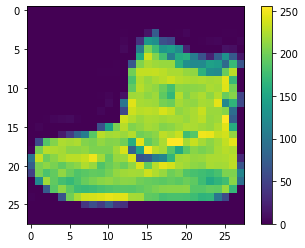

In [56]:
#preprocessing the data...
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [57]:
train_images = train_images /255.0
test_images = test_images / 255.0

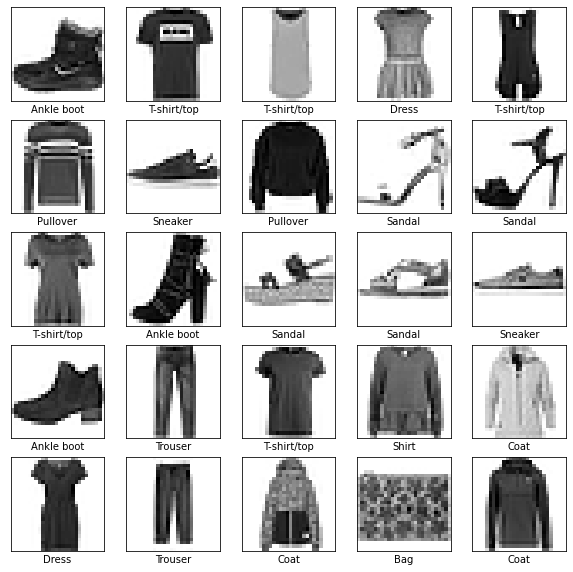

In [58]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [59]:
#build the model
  #setup the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
#training the model
#feeding the model
model.fit(train_images,train_labels,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4947 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2477 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [63]:
#evaluating accuracy
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\n test accuracy',test_acc)

313/313 - 0s - loss: 0.3285 - accuracy: 0.8867 - 405ms/epoch - 1ms/step

 test accuracy 0.8866999745368958


In [64]:
#making predictions
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [65]:
predictions=probability_model.predict(test_images)

In [66]:
predictions[0]

array([1.4626485e-10, 2.7024489e-12, 5.7290041e-11, 3.0334291e-09,
       7.5165131e-11, 8.1803855e-03, 5.8027888e-10, 6.1573139e-03,
       4.5455946e-09, 9.8566228e-01], dtype=float32)

In [67]:
np.argmax(predictions[0])

9

In [68]:
test_labels[0]

9

In [81]:
#graphing
def plot_image(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color=color)
  
def plot_value_array(i,predictions_array,true_label):
  true_label=true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array,color='#777777')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color='red'
  thisplot[true_label].set_color='blue'

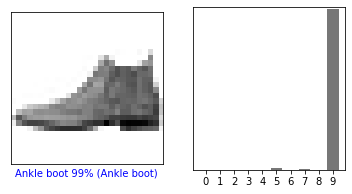

In [82]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

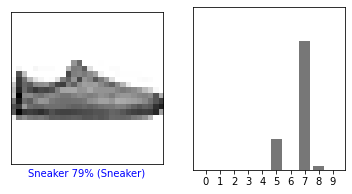

In [83]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

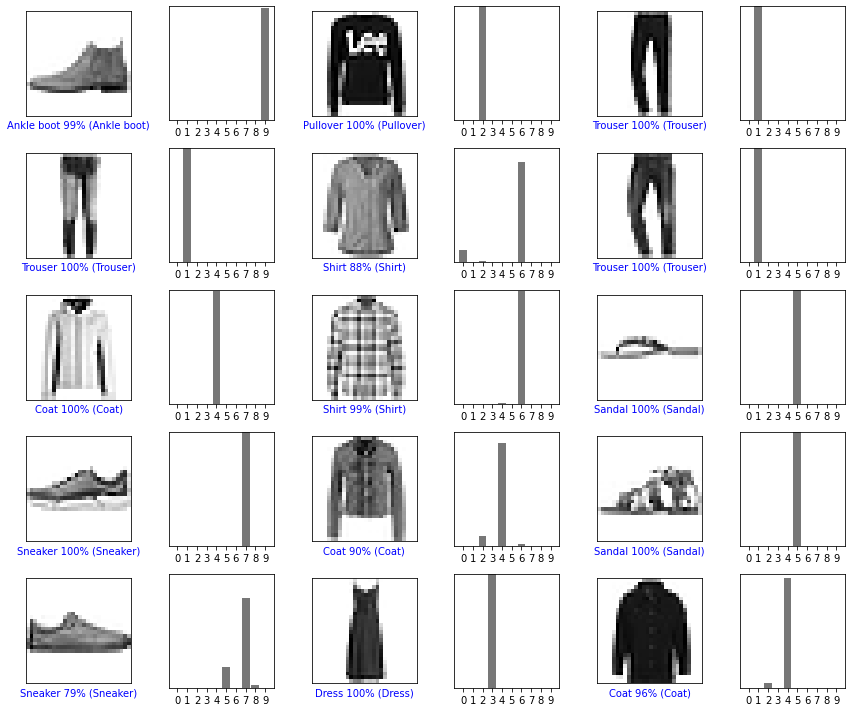

In [84]:
#plot the first x test images, their predicted labels,and the true labels
#color correct predictions in blue and incorrect predictions in red
num_rows=5
num_cols=3
num_images=num_cols*num_rows
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [85]:
#using the trained model
#grabbing an image from test dataset
img = test_images[1]
print(img.shape)

(28, 28)


In [86]:
#adding the image to a batch where its the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [87]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.7527620e-05 1.2246212e-12 9.9944419e-01 7.5441294e-12 5.0463283e-04
  6.7052440e-12 3.3555942e-05 2.3831417e-13 2.3282642e-10 3.3736878e-11]]


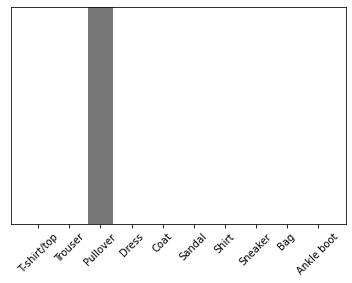

In [88]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [89]:
np.argmax(predictions_single[0])

2